<a href="https://colab.research.google.com/github/ngonhan2k5/cs-ml/blob/master/proj1/AUC_Curve.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Load Data**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
#load data
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', skipinitialspace=True, na_values="?")
df.columns = ['age', 'workclass', 'fnlwgt', 'education', 
                     'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 
                     'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']
#df.describe()
df.sample(4)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
4635,46,Private,34377,Assoc-acdm,12,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,>50K
19334,52,Private,210736,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,3103,0,55,United-States,>50K
22562,21,Private,141453,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,40,United-States,<=50K
9965,40,Private,273425,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States,>50K


# kNN

# Decision Tree

In [17]:
def decision_tree():
  #remove records missing values
  no_missing_df= df.drop(df[df.native_country.isnull()].index)
  no_missing_df= no_missing_df.drop(no_missing_df[no_missing_df.workclass.isnull()].index)
  no_missing_df= no_missing_df.drop(no_missing_df[no_missing_df.occupation.isnull()].index)
  no_missing_df.isnull().sum().max() #just checking that there's no missing data missing...

  #LabelEncoder
  from sklearn.preprocessing import LabelEncoder
  le= LabelEncoder()
  no_missing_df['workclass_num']= le.fit_transform(no_missing_df['workclass'])
  no_missing_df['marital_status_num']= le.fit_transform(no_missing_df['marital_status'])
  no_missing_df['occupation_num']= le.fit_transform(no_missing_df['occupation'])
  no_missing_df['relationship_num']= le.fit_transform(no_missing_df['relationship'])
  no_missing_df['race_num']= le.fit_transform(no_missing_df['race'])
  no_missing_df['sex_num']= le.fit_transform(no_missing_df['sex'])
  no_missing_df['native_country_num']= le.fit_transform(no_missing_df['native_country'])
  no_missing_df['income_num']= le.fit_transform(no_missing_df['income'])

  #remove the unnecessary features
  neccessary_columns_df= no_missing_df.drop(columns=['fnlwgt', 'education', 'workclass', 'income', 'marital_status', 'occupation', 'sex', 'relationship', 'native_country', 'race'])

  #separate input and target
  X= neccessary_columns_df.drop('income_num', axis='columns')
  y= neccessary_columns_df['income_num']

  #Shuffle and Split data into Training, Testing dataframe
  from sklearn.model_selection import train_test_split
  X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.3, random_state=1)
  print("Training Data:", X_train.shape, y_train.shape)
  print("Testing Data :", X_test.shape, y_test.shape)
  print('Train: {}% | Test {}%'.format(round(len(y_train)/len(y),2), round(len(y_test)/len(y),2)))

  from sklearn.tree import DecisionTreeClassifier
  best_clf= DecisionTreeClassifier(criterion= 'gini', max_depth=9, min_samples_leaf=3, min_samples_split=8)
  best_clf= best_clf.fit(X_train, y_train)
  score= best_clf.score(X_test, y_test)
  return X_test, y_test, best_clf


In [19]:
X_test, y_test, dt_clf= decision_tree()

Training Data: (21112, 12) (21112,)
Testing Data : (9049, 12) (9049,)
Train: 0.7% | Test 0.3%


## SVM

# Logit

# Random Forest

## AUC Curve

In [20]:
X_test, y_test, dt_clf= decision_tree()

Training Data: (21112, 12) (21112,)
Testing Data : (9049, 12) (9049,)
Train: 0.7% | Test 0.3%


<Figure size 432x288 with 0 Axes>

(0.0, 1.0)

(0.0, 1.05)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'Receiver operating characteristic')

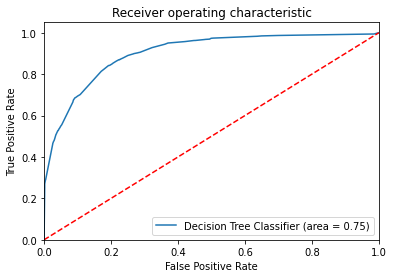

In [24]:
#ROC Curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

plt.figure()

#Decision Tree
dt_roc_auc = roc_auc_score(y_test, dt_clf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, dt_clf.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, label='Decision Tree Classifier (area = %0.2f)' % dt_roc_auc)

# rdf_roc_auc = roc_auc_score(y_test, rdf_clf.predict(X_test))
# fpr, tpr, thresholds = roc_curve(y_test, rdf_clf.predict_proba(X_test)[:,1])
# plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % rdf_roc_auc)


plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('dt_ROC')
plt.show()